---
title: The happiness project
categories:
- Linear Regression
- Ridge 
- Lasso
- Elastic Net Regression
feature_image: /assets/img/happiness/happy_people.jpg
---
Would you rather be rich or happy? I'd rather be both...and healthy too! 

![png](/assets/img/happiness/output_74_0.png)
 
Many people, organizations and even governments have started looking at happiness as a metric to measure success besides economic indicators.
Being happy is a simple yet extremely profound feeling. It is also hard to define. Nevertheless, its measure may point to the gaps in the government development policies in each country and one may potentially view the measure as people’s perception of how their governments perform.  The insights from its analysis also helps in pointing out the importance of development in several aspects instead of just narrowly in economic indicators.

This work is focused on datasets (from 2015 to 2019) from the World Happiness Report Landmark Survey. Its objective is predicting the happiness score of a country based on independent features and identifying the key variables and potentially their interactions.

Turns out we can predict mean happiness score of people in a location with an error of about 0.55 (much better than baseline) as per the above scoring criteria. Ridge and Lasso gave very similar results with Elastic Net Regression model giving only a slight improvement.

Happiness is affected the most by Economic Wellbeing, followed by Health, Social Support and Freedom. 

Even this simple dataset with not too many features it is not trivial to deal with collinearity or with non-linear effects. 2nd, 3rd and even 4th order polynomial fits were attempted with no improvements. It may be that another method may work better.

This project was part of the UH SPE Machine Learning Bootcamp and collaborators were myself, Celine Cherian, Miguel Mendoza and Pratik Ghatake. Here goes the full work below:

* [Libraries ](#libraries)
* [Data loading, cleaning and visualizations](#data-loading-cleaning-and-visualizations)
* [Descriptive Analytics](#Descriptive-Analytics)
* [Analysis](#analysis)
    * [Baseline Estimate](#Baseline-Estimate)
    * [Ridge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)
    * [Elastic Net Regression](#Elastic-Net-Regression)
* [Summary](#Summary)


# Libraries <a id='libraries'></a>


In [4]:
# Data Analysis and Manipulation
import numpy as np
import pandas as pd
from numpy import NaN as NA

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sb
from plotly.offline import init_notebook_mode, iplot

# Analysis 
import sklearn.linear_model as lm
from sklearn.feature_selection import rfe
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.metrics import mean_squared_error, r2_score

## Data loading, cleaning and visualizations <a id='data-loading-cleaning-and-visualizations'></a>


The United Nations publishes the World Happiness Report every year but years 2015 to 2019 are selected for this analysis. The rankings of the happiness report are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors. There are different fields involved in the dataset including economics, psychology, national statistical figures etc. which are measured on different scales and are used to effectively assess the happiness score of the country. There are a total 782 observations of different countries for the span of 5 years in total with 9 different variables. 


In [5]:
df2015= pd.read_csv('2015.csv') 
df2016= pd.read_csv('2016.csv')
df2017= pd.read_csv('2017.csv')
df2018= pd.read_csv('2018.csv')
df2019= pd.read_csv('2019.csv')

In [6]:
yearsData = ['2015','2016','2017','2018','2019']
dfs = [df2015.shape,df2016.shape,df2017.shape,df2018.shape,df2019.shape]

for i in range(len(dfs)):
  print("Current dimensions for {0} are {1}".format(yearsData[i],dfs[i])) 

Current dimensions for 2015 are (158, 12)
Current dimensions for 2016 are (157, 13)
Current dimensions for 2017 are (155, 12)
Current dimensions for 2018 are (156, 9)
Current dimensions for 2019 are (156, 9)


In [7]:
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
df2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [11]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df2015.drop(['Region','Standard Error','Dystopia Residual'],axis=1, inplace = True) 

df2015.rename(columns = {'Trust (Government Corruption)':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices'},inplace = True)

# switch columns "Perceptions of Corruption" and "Generosity"
df2015new = df2015[['Country or Region','Happiness Rank', 'Happiness Score',

       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]


# drop columns
df2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1, inplace = True) 

# rename columns
df2016.rename(columns = {'Trust (Government Corruption)':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices'},inplace = True)

# switch columns "Perceptions of Corruption" and "Generosity" 
df2016.columns
df2016new = df2016[['Country or Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]

# drop columns
df2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1, inplace = True) 

# rename columns
df2017.rename(columns = {'Trust..Government.Corruption.':'Perceptions of corruption','Country':'Country or Region',
                         'Family':'Social Support','Freedom':'Freedom to make life choices','Happiness.Rank':'Happiness Rank',
                         'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                         'Health..Life.Expectancy.':'Health (Life Expectancy)'},inplace = True)

# just needed to rename dataframe for this part
df2017new = df2017

# rename columns
df2018.rename(columns = {'Overall rank':'Happiness Rank','Country or region':'Country or Region','Score':'Happiness Score',
                         'GDP per capita':'Economy (GDP per Capita)', 'Social support': 'Social Support',
                        'Healthy life expectancy':'Health (Life Expectancy)'},inplace = True)

# switch "Country or region" and "Happiness Rank"
df2018new = df2018[['Country or Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 
                    'Social Support','Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]

# rename columns
df2019.rename(columns = {'Overall rank':'Happiness Rank','Country or region':'Country or Region','Score':'Happiness Score',
                         'GDP per capita':'Economy (GDP per Capita)','Social support': 'Social Support',
                         'Healthy life expectancy':'Health (Life Expectancy)'},inplace = True)

# switch "Country or region" and "Happiness Rank"
df2019new = df2019[['Country or Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 
                    'Social Support','Health (Life Expectancy)', 'Freedom to make life choices','Generosity','Perceptions of corruption']]

**Assigning year to the data (only to remove it later :)):**

In [13]:
df2015new.loc[:,"Year"] = 2015
df2016new.loc[:,"Year"] = 2016
df2017new.loc[:,"Year"] = 2017
df2018new.loc[:,"Year"] = 2018
df2019new.loc[:,"Year"] = 2019

c:\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# yearsData was defined at the beginning of script
dfsNew = [df2015new.shape,df2016new.shape,df2017new.shape,df2018new.shape,df2019new.shape]

for i in range(len(dfsNew)):
  print("Current dimensions for {0} are {1}".format(yearsData[i],dfsNew[i])) 

print("")

Current dimensions for 2015 are (158, 10)
Current dimensions for 2016 are (157, 10)
Current dimensions for 2017 are (155, 10)
Current dimensions for 2018 are (156, 10)
Current dimensions for 2019 are (156, 10)



**Merging Datasets:**

In [15]:
df = pd.concat([df2015new,df2016new,df2017new,df2018new,df2019new])
df.index = np.arange(1, len(df)+1)
df

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
1,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
2,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
3,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
4,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
5,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
778,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
779,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
780,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
781,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


**Understanding High level structure of the datase:**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 1 to 782
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or Region             782 non-null    object 
 1   Happiness Rank                782 non-null    int64  
 2   Happiness Score               782 non-null    float64
 3   Economy (GDP per Capita)      782 non-null    float64
 4   Social Support                782 non-null    float64
 5   Health (Life Expectancy)      782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     781 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [17]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


**Missing data:**

In [18]:
df.isnull().sum()

Country or Region               0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social Support                  0
Health (Life Expectancy)        0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

We're dropping that row with missing data of Perception of Corruption.

In [19]:
df = df.dropna()

# Descriptive Analytics <a id='Descriptive-Analytics'></a>

Quickly geting an idea of the overall correlation between the target variable and each input variable. Correlations are sorted in descending order. Thus, those variables at the bottom do not necessarily have the least predictive power; predictive power depends on the absolute value of correlation - generally, the larger the absolute value of correlation, the higher its predictive power.

In [20]:
df.corr()['Happiness Score'].sort_values(ascending=False)

Happiness Score                 1.000000
Economy (GDP per Capita)        0.789719
Health (Life Expectancy)        0.742843
Social Support                  0.651246
Freedom to make life choices    0.553365
Perceptions of corruption       0.398418
Generosity                      0.138142
Year                            0.005946
Happiness Rank                 -0.992053
Name: Happiness Score, dtype: float64

In [21]:
df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
Happiness Rank,1.000000,-0.992053,-0.795110,-0.647420,-0.744099,-0.540151,-0.118290,-0.372781,-0.006594
Happiness Score,-0.992053,1.000000,0.789719,0.651246,0.742843,0.553365,0.138142,0.398418,0.005946
Economy (GDP per Capita),-0.795110,0.789719,1.000000,0.592889,0.787752,0.345615,-0.013646,0.306307,0.017230
Social Support,-0.647420,0.651246,0.592889,1.000000,0.573252,0.419795,-0.037597,0.126401,0.368585
Health (Life Expectancy),-0.744099,0.742843,0.787752,0.573252,1.000000,0.341155,0.010718,0.250512,0.130138
Freedom to make life choices,-0.540151,0.553365,0.345615,0.419795,0.341155,1.000000,0.290564,0.459593,0.011118
Generosity,-0.118290,0.138142,-0.013646,-0.037597,0.010718,0.290564,1.000000,0.318920,-0.192416
Perceptions of corruption,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,0.318920,1.000000,-0.122264
Year,-0.006594,0.005946,0.017230,0.368585,0.130138,0.011118,-0.192416,-0.122264,1.000000


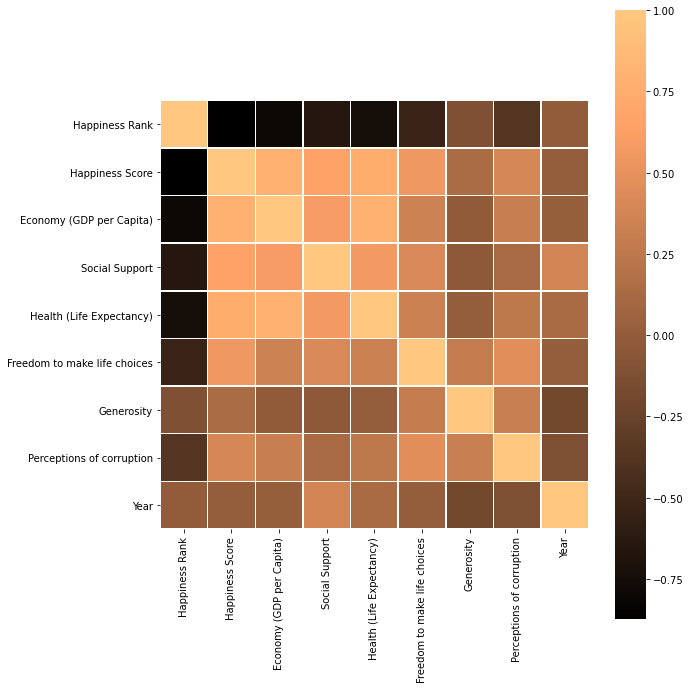

In [23]:
plot_1= plt.subplots(figsize=(9.6,11.2))
sb.heatmap(df.corr(),fmt='d', cmap="copper", linewidths=0.6, square=True,robust=True)

And to sum it up let's do a correlogram (dropping the year and happiness rank):

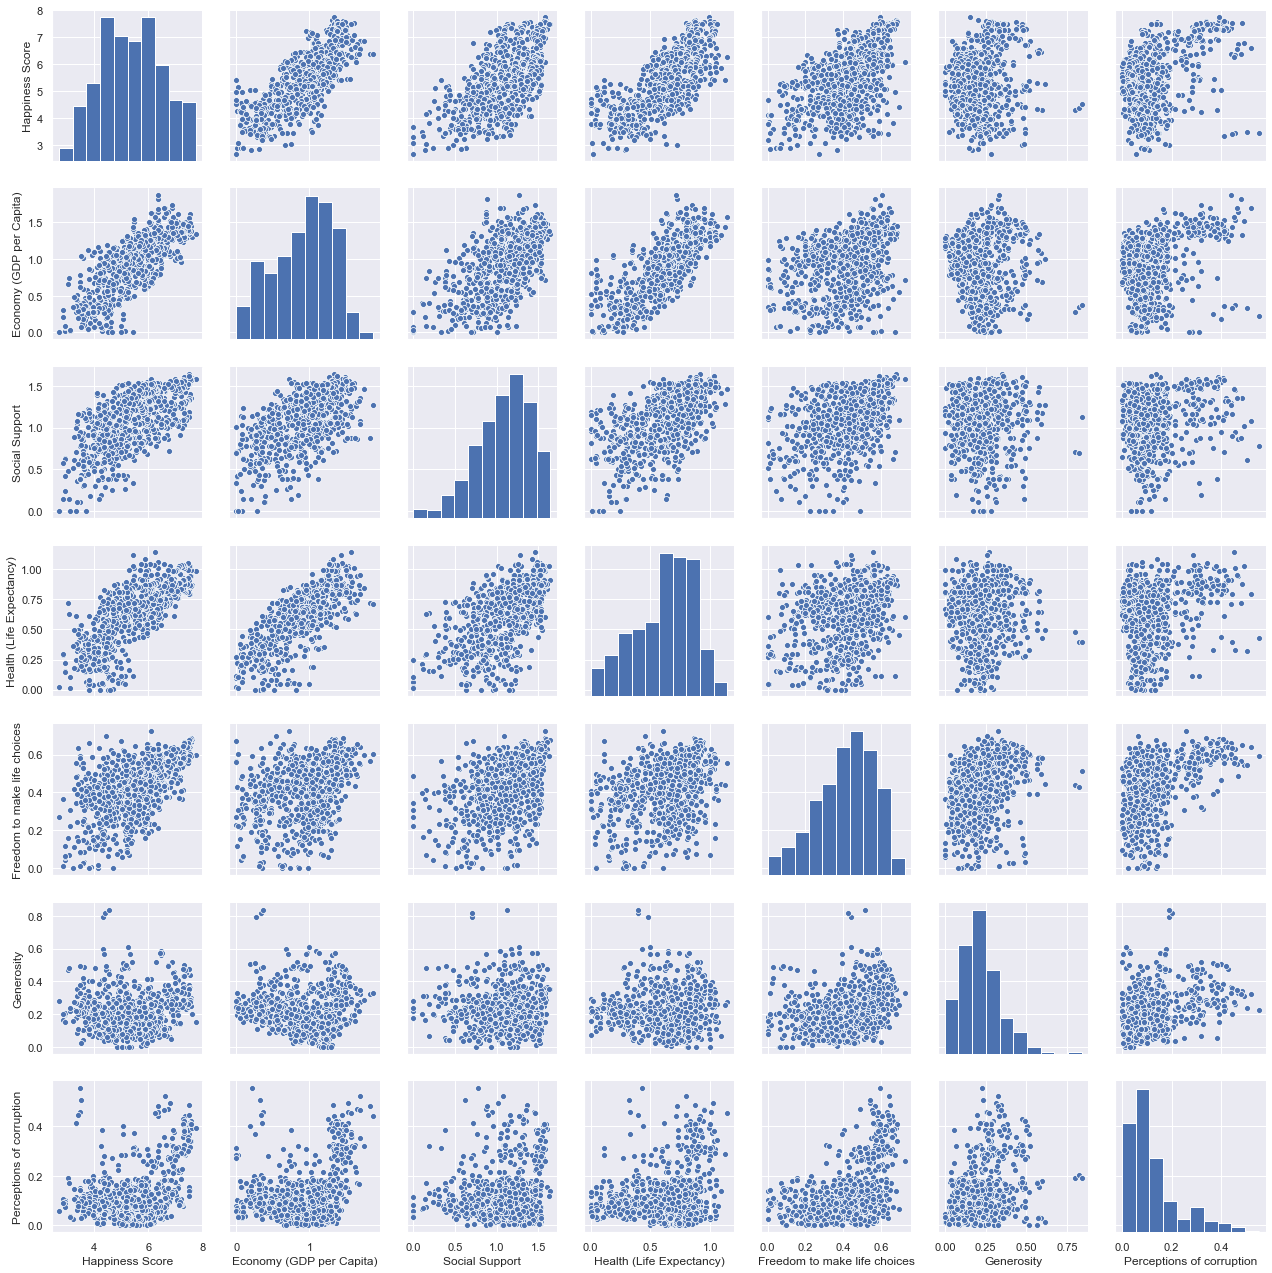

In [260]:
sb.pairplot(df.drop(['Year', 'Happiness Rank'], axis = 1))

**Inferences:**

- All variables except Generosity appear to predict the Happiness Score with medium correlation
- The usefulness and independency of the the variable Generosity in predicting the target variable will be checked in feature selection techniques.

And most importantly:
-  **There are many collinear features in this dataset**


#  Analysis <a id='analysis'></a>

## Baseline Estimate<a id='baseline-estimate'></a>

Before any fancy data science or machine learning it's a good idea to establish a baseline against what to compare our results to. What would the error be if we just randomly guesed the happiness score of a country? That's what our analysis should aim to beat.

Let's find the standard deviation of the Happiness Score and then multiply it with 0.67 (area under standard normal distribution curve ~ 0.5); that should give us a rough idea that what a random guess error would be:

In [25]:
df['Happiness Score'].std()*0.67449

0.7601983240898008

If our models cannot predict happiness within 0.76 on averaage then they are completely worthless!

**Setting up data for analysis:**

In [93]:
X = df.drop(['Country or Region','Happiness Score','Happiness Rank','Year'], axis = 1)
y = df['Happiness Score']

**Normalizing data:**

In [94]:
mean = X.mean()
std = X.std()
X = (X - mean)/std

**Training and test data being 30% of total:**

In [97]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Ridge Regression <a id='Ridge-Regression'></a>


**Let's define a function to give us root mean square error rmse, with a number of validation groups  = 5:**

In [197]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [198]:
ridge = Ridge()

In [199]:
alphas = np.geomspace(0.01, 100, 31) #  I played to come up with this exact range for a nice graph below
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]


Text(0, 0.5, 'rmse')

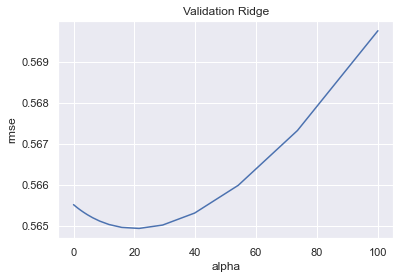

In [200]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

**Best alpha is ~22, but mattering very very little!**

Let's plot the coefficients with respect to alpha

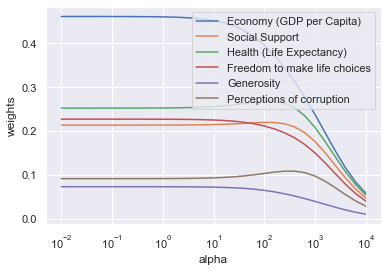

In [203]:
alphas = np.geomspace(0.01, 10000, 31)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X_train.columns)

In [143]:
np.min(cv_ridge)

0.5649329314599901

Ridge Regression gets an rmse of about 0.565

Let's fit the model with alpha = 22

In [204]:
ridge = Ridge(alpha = 22)
ridge.fit(X_train, y_train)

Ridge(alpha=22)

Let's plot coefficients of each variable and predicted versus actual happiness score in the test set:

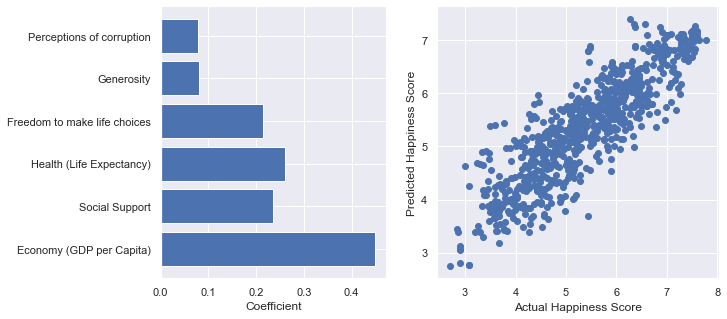

In [234]:
ridge_coefficients = pd.DataFrame(ridge.coef_, index=X.columns, columns= ['Coefficient'])
pred_ridge = ridge.predict(X)

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.25]})
ax[1].scatter(y, pred_ridge)
ax[1].set_xlabel('Actual Happiness Score')
ax[1].set_ylabel('Predicted Happiness Score')
ax[0].barh(ridge_coefficients.index, ridge_coefficients['Coefficient'])
ax[0].set_xlabel('Coefficient')
fig.set_size_inches([10, 5])

As seen, Economy has the highest effect on happiness followed by almost equally weighed Life Expectancy, Social Support and Freedom. Generosity and Perception of corruption have the least effect.

Let us now plot residual error versus happiness score:

Text(0, 0.5, 'Prediction Error Ridge')

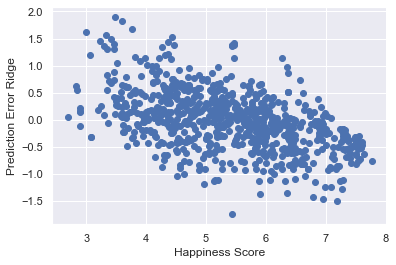

In [233]:
pred_ridge = ridge.predict(X)
error_ridge = pred_ridge - y
plt.scatter(y, error_ridge)
plt.xlabel('Happiness Score')
plt.ylabel('Prediction Error Ridge')

This does not look very good, there appears to be a trend in the residual error.

## Lasso Regression <a id='Lasso-Regression'></a>

Trying Lassso similarly as above:

In [222]:
alphas = np.geomspace(0.001,1, 101) #  I played to come up with this exact range for a nice graph below
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

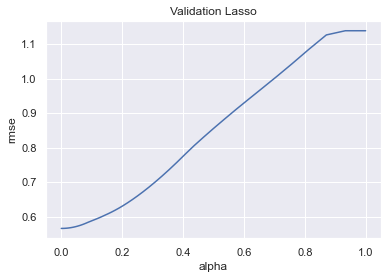

In [223]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

Lasso does not really provide anything useful here. The minimum rmse is obtained with an alpha = 0. This may is expected since there are few fatures.

Let's plot the coefficients with respect to alpha for academic purposes only as this will have no practical consequence.

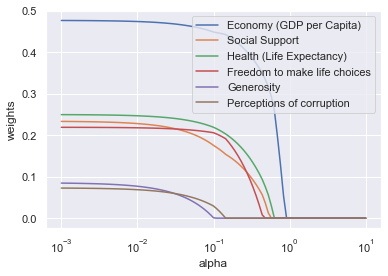

In [217]:
lasso = Lasso()
alphas = np.geomspace(0.001,10, 101)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X_train.columns)

If we wanted to reduce the number of features by 2 we could set up alpha ~0.2; this however would increase rmse.

In [218]:
np.min(cv_lasso)

0.5655072419242062

Lasso gives us similar performance as Ridge (only slightly worse)

In [225]:
lasso = Ridge(alpha = 0)
lasso.fit(X_train, y_train)

Ridge(alpha=0)

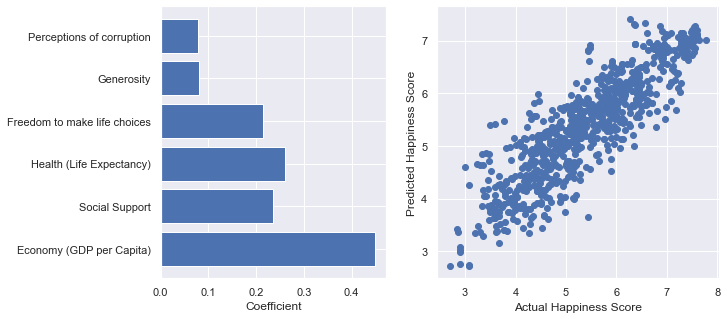

In [231]:
lasso_coefficients = pd.DataFrame(lasso.coef_, index=X.columns, columns= ['Coefficient'])
pred_lasso = lasso.predict(X)

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.25]})
ax[1].scatter(y, pred_lasso)
ax[1].set_xlabel('Actual Happiness Score')
ax[1].set_ylabel('Predicted Happiness Score')
ax[0].barh(ridge_coefficients.index, ridge_coefficients['Coefficient'])
ax[0].set_xlabel('Coefficient')
fig.set_size_inches([10, 5])

Very similar to Ridge...

Let us now plot residual error versus happiness score:


Text(0, 0.5, 'Prediction Error Lasso')

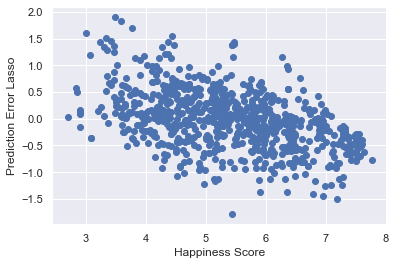

In [229]:
pred_lasso = lasso.predict(X)
error_lasso = pred_lasso - y
plt.scatter(y, error_lasso)
plt.xlabel('Happiness Score')
plt.ylabel('Prediction Error Lasso')

Again, there appears to be a trend, however slight.

## Elastic Net Regression <a id='Elastic-Net-Regression'></a>

Let's bring in the big guns and try Elastic Net regression

In [248]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,
                    param_grid={'alpha':np.logspace(-5,4,50),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

Let's find the best fitting:

In [249]:
search.fit(X_train,y_train)
search.best_params_

{'alpha': 8.286427728546843e-05, 'l1_ratio': 0.2}

In [250]:
abs(search.best_score_)**0.5

0.562796603750156

A very, very tiny improvement compared to Lasso and Ridge but here it is!

In [252]:
elastic=ElasticNet(normalize=True,alpha=8.286427728546843e-05,l1_ratio=0.2)
elastic.fit(X_train,y_train)


ElasticNet(alpha=8.286427728546843e-05, l1_ratio=0.2, normalize=True)

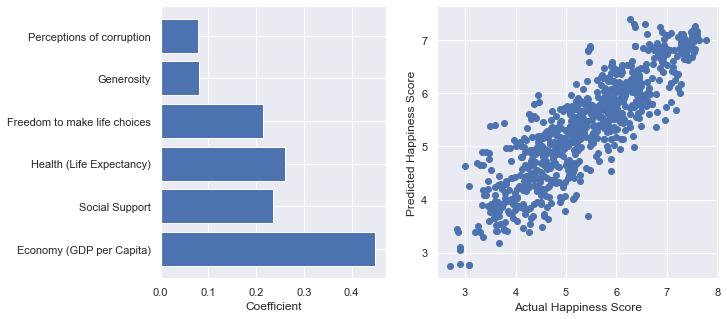

In [254]:
elastic_coefficients = pd.DataFrame(elastic.coef_, index=X.columns, columns= ['Coefficient'])
pred_elastic = elastic.predict(X)

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.25]})
ax[1].scatter(y, pred_elastic)
ax[1].set_xlabel('Actual Happiness Score')
ax[1].set_ylabel('Predicted Happiness Score')
ax[0].barh(ridge_coefficients.index, ridge_coefficients['Coefficient'])
ax[0].set_xlabel('Coefficient')
fig.set_size_inches([10, 5])

Almost identical to previous!

Text(0, 0.5, 'Prediction Error Elastic')

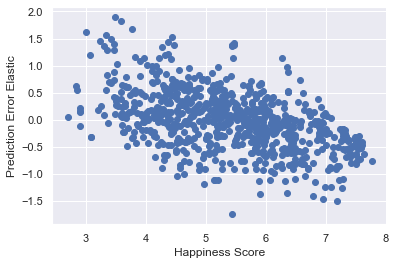

In [255]:
error_elastic = pred_elastic - y
plt.scatter(y, error_elastic)
plt.xlabel('Happiness Score')
plt.ylabel('Prediction Error Elastic')

## Summary <a id='Summary'></a>

Turns out we can predict mean happiness score of people in a location with an error of about 0.55 as per the above scoring criteria. Ridge and Lasso gave very similar results with Elastic Net Regression model giving only a slight improvement.

Happiness is affected the most by Economic Wellbeing, followed by Health, Social Support and Freedom. 

Even this simple dataset with not too many features it is not trivial to deal with collinearity or with non-linear effects. 2nd, 3rd and even 4th order polynomial fits were attempted with no improvements. It may be that another method may work better. I am planning to apply PCA, neural networks and tree models and compare their performance againts the regression benchmark.

Till then, prosper, stay healthy and be happy!